## 변수중요도 : Feature Importance

### 1. 환경준비

In [1]:
# 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# data load
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


* 변수 설명
    * crim : 범죄율
    * zn : 대저택 비율
    * indus : 산업단지 비율
    * chas : 찰스 강변 여부
    * nox : 일산화질소 농도(공기오염도)
    * rm : 평균 주택당 방 수
    * age : 30년 이상된 주택 비율
    * dis : 주요 업무 지역 접근성 지수
    * rad : 고속도로 접근성 지수
    * tax  1만 달러당 재산세
    * ptratio : 교사 1명당 학생수
    * lstat : 하위계층 비율
    * black : 흑인비율(원래 숫자를 변형한 것임)
    * mdev : 타운별 집값 중위수(단위 : 1000달러)

In [3]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

### 2. 데이터 준비

In [4]:
# x, y split
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [5]:
# dummy

In [6]:
# train, valid split
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2022)
x_train.shape

(404, 13)

### 3. Feature Importance

#### 1) Decision Tree

In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import * 

In [9]:
# modeling
model = DecisionTreeRegressor(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'rm <= 6.941\nsquared_error = 86.333\nsamples = 404\nvalue = 23.054'),
 Text(0.25, 0.625, 'lstat <= 14.395\nsquared_error = 37.066\nsamples = 339\nvalue = 20.219'),
 Text(0.125, 0.375, 'dis <= 1.373\nsquared_error = 24.597\nsamples = 215\nvalue = 23.209'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 14.644\nsamples = 212\nvalue = 22.83'),
 Text(0.375, 0.375, 'crim <= 6.912\nsquared_error = 16.316\nsamples = 124\nvalue = 15.035'),
 Text(0.3125, 0.125, 'squared_error = 9.353\nsamples = 73\nvalue = 17.04'),
 Text(0.4375, 0.125, 'squared_error = 12.303\nsamples = 51\nvalue = 12.167'),
 Text(0.75, 0.625, 'rm <= 7.437\nsquared_error = 82.696\nsamples = 65\nvalue = 37.842'),
 Text(0.625, 0.375, 'nox <= 0.659\nsquared_error = 47.946\nsamples = 37\nvalue = 31.857'),
 Text(0.5625, 0.125, 'squared_error = 22.094\nsamples = 34\nvalue = 33.397'),
 Text(0.6875, 0.125, 'squared_error = 9.307\nsamples = 3\nvalue = 14.4

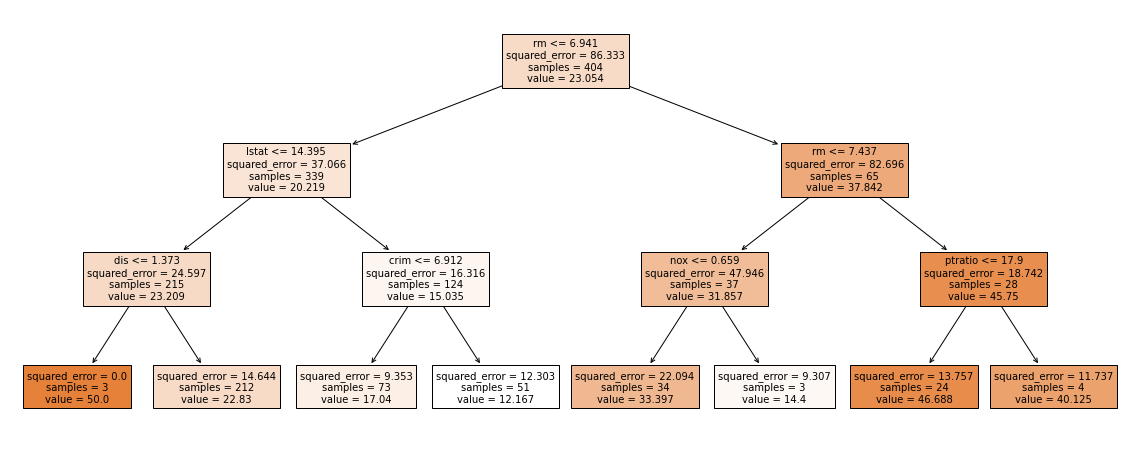

In [10]:
# 시각화
plt.figure(figsize=(20, 8))
plot_tree(model, feature_names=x.columns, filled=True, fontsize=10)

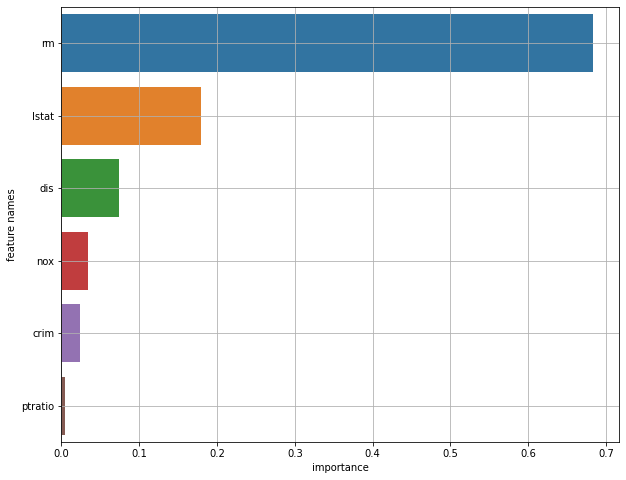

In [11]:
# Feature Importances
result = plot_feature_importance(model.feature_importances_, list(x), 6)

In [12]:
result

,feature_names,feature_importance
0,rm,0.682914
1,lstat,0.179261
2,dis,0.074513
3,nox,0.033946
4,crim,0.024328
5,ptratio,0.005038


In [13]:
# 튜닝 이후 변수 중요도 다시 확인
from sklearn.model_selection import GridSearchCV

params = {'max_depth': range(1, 10)}
model = DecisionTreeRegressor()
model_gs = GridSearchCV(model, params, cv=5)
model_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10)})

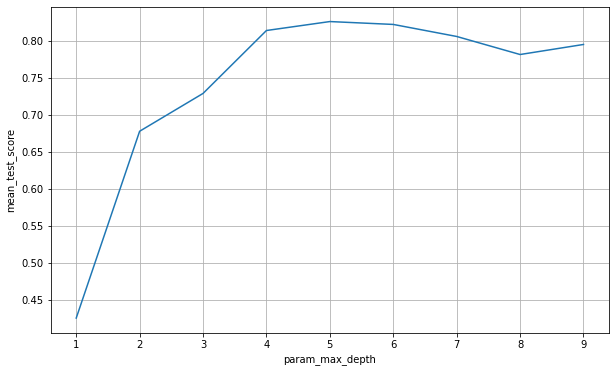

In [14]:
# 튜닝 과정 로그를 df로 저장
result = pd.DataFrame(model_gs.cv_results_)

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_max_depth', y='mean_test_score', data=result)
plt.grid()
plt.show()

In [15]:
best_model = model_gs.best_estimator_

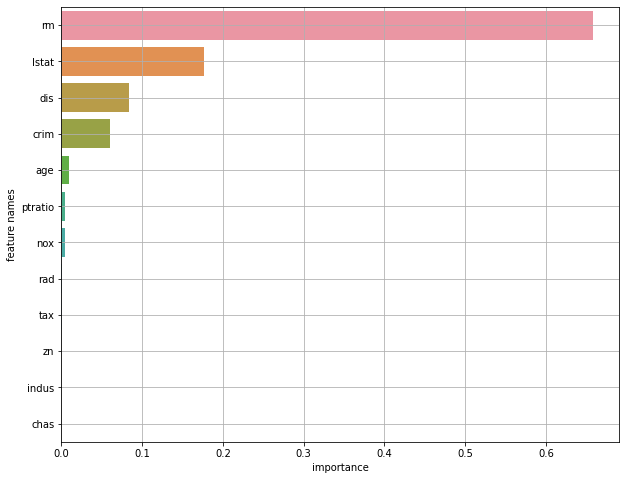

In [16]:
result = plot_feature_importance(best_model.feature_importances_, list(x), 12)

In [17]:
pred = best_model.predict(x_val)
print(mean_absolute_error(y_val, pred))

3.2276587233133722


#### 2) Random Forest

In [18]:
# modeling
from sklearn.ensemble import RandomForestRegressor

In [19]:
n_est = 3
model = RandomForestRegressor(n_estimators=n_est, max_depth=2)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=3)

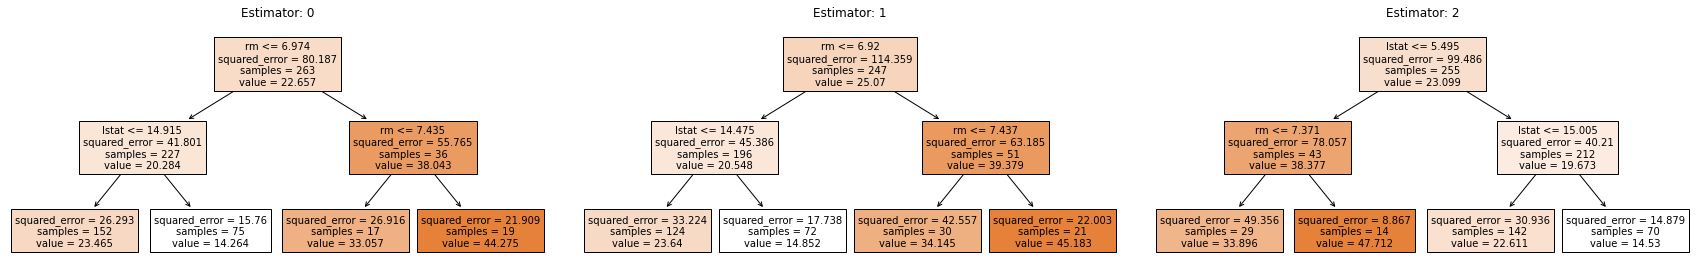

In [20]:
fn = list(x_train)
cn = ["0","1"]
fig, axes = plt.subplots(nrows=1, ncols=n_est, figsize=(24,4))
for index in range(0, n_est):
    plot_tree(model.estimators_[index],
                   feature_names=fn, 
                   class_names=cn,
                   filled=True, fontsize=10,
                   ax=axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize=12)
    
plt.tight_layout()
plt.show()

In [21]:
fi = x_train.iloc[0:0]
for i in range(n_est) :
    fi.loc[i] = model.estimators_[i].feature_importances_

In [22]:
fi

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.0,0.0,0.0,0.0,0.0,0.710289,0.0,0.0,0.0,0.0,0.0,0.0,0.289711
1,0.0,0.0,0.0,0.0,0.0,0.843256,0.0,0.0,0.0,0.0,0.0,0.0,0.156744
2,0.0,0.0,0.0,0.0,0.0,0.105906,0.0,0.0,0.0,0.0,0.0,0.0,0.894094


In [23]:
fi.mean(axis=0)

crim       0.00000
zn         0.00000
indus      0.00000
chas       0.00000
nox        0.00000
rm         0.55315
age        0.00000
dis        0.00000
rad        0.00000
tax        0.00000
ptratio    0.00000
black      0.00000
lstat      0.44685
dtype: float64

In [24]:
fi_rf = {}

for i, v in enumerate(list(x)):
    fi_rf[v] = model.feature_importances_[i]
    
pd.DataFrame(fi_rf, index=[0])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.0,0.0,0.0,0.0,0.0,0.55315,0.0,0.0,0.0,0.0,0.0,0.0,0.44685


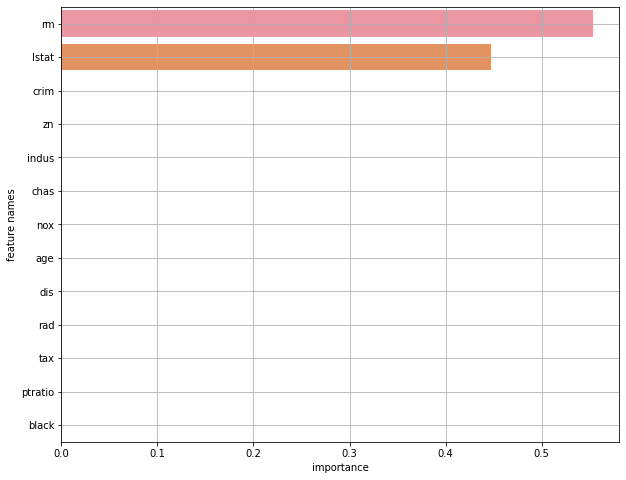

In [25]:
result = plot_feature_importance(model.feature_importances_, list(x))

- tree = 100개 Random Forest 모델 만들기

In [26]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
# 트리 전체 중요도 저장
fi = x_train.iloc[0:0]
for i in range(100) :
    fi.loc[i] = model.estimators_[i].feature_importances_

In [28]:
fi

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.029413,0.000873,0.001841,0.000415,0.013476,0.610323,0.025419,0.025071,0.001473,0.017678,0.006269,0.011274,0.256473
1,0.035531,0.005947,0.001552,0.000106,0.008571,0.632827,0.016224,0.037263,0.004461,0.002145,0.020900,0.009307,0.225167
2,0.013912,0.000469,0.000697,0.004523,0.030022,0.173575,0.025025,0.037561,0.002771,0.013332,0.011092,0.001293,0.685729
3,0.042373,0.000097,0.004911,0.002198,0.004606,0.722128,0.010612,0.041333,0.000724,0.004361,0.006430,0.009075,0.151152
4,0.032920,0.000649,0.001717,0.000034,0.009099,0.680565,0.010759,0.027048,0.001136,0.005766,0.011500,0.008339,0.210467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.035688,0.000207,0.011170,0.000000,0.009329,0.712367,0.014669,0.048817,0.000985,0.001058,0.010397,0.005728,0.149585
96,0.020896,0.000009,0.028992,0.000673,0.030245,0.577501,0.019068,0.029865,0.005845,0.004485,0.009661,0.013032,0.259728
97,0.015093,0.000185,0.002673,0.004698,0.019232,0.167701,0.006447,0.056769,0.006888,0.009439,0.002852,0.007500,0.700523
98,0.017058,0.001084,0.021994,0.000737,0.008136,0.153988,0.011165,0.029095,0.003584,0.014325,0.004888,0.007023,0.726922


In [29]:
# 트리 100개의 평균 중요도
fi.mean(axis=0)

crim       0.033920
zn         0.000802
indus      0.006710
chas       0.001206
nox        0.015428
rm         0.459729
age        0.015989
dis        0.067452
rad        0.003426
tax        0.009353
ptratio    0.009872
black      0.009767
lstat      0.366346
dtype: float64

In [30]:
fi_rf = {}

for i, v in enumerate(list(x)) :
    fi_rf[v] = model.feature_importances_[i]

pd.DataFrame(fi_rf, index = [0])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.03392,0.000802,0.00671,0.001206,0.015428,0.459729,0.015989,0.067452,0.003426,0.009353,0.009872,0.009767,0.366346


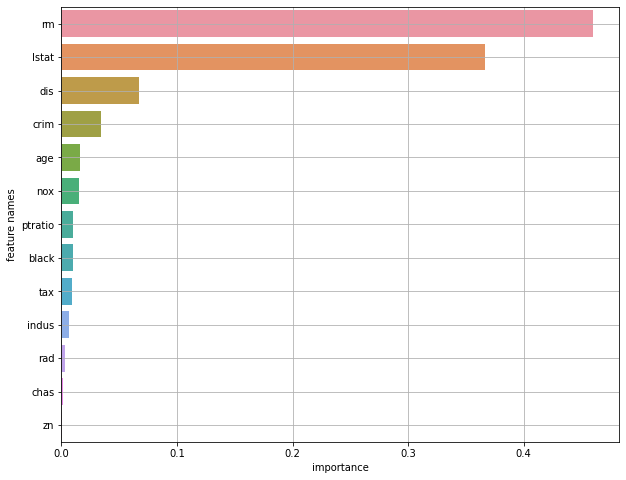

In [31]:
result = plot_feature_importance(model.feature_importances_, list(x))

In [32]:
pred = model.predict(x_val)
print(mean_absolute_error(y_val, pred))

2.49743137254902


#### 3) XGB

In [33]:
from xgboost import XGBRegressor, plot_tree, plot_importance

In [34]:
# modeling
model = XGBRegressor(n_estimators=10, max_depth=2, objective='reg:squarederror')
model.fit(x_train, y_train)

XGBRegressor(max_depth=2, n_estimators=10, objective='reg:squarederror')

- plot tree
    - XGB 제공 plot tree.
    - XGB에서의 트리 시각화는 여러 estimator중 하나씩만 가능.

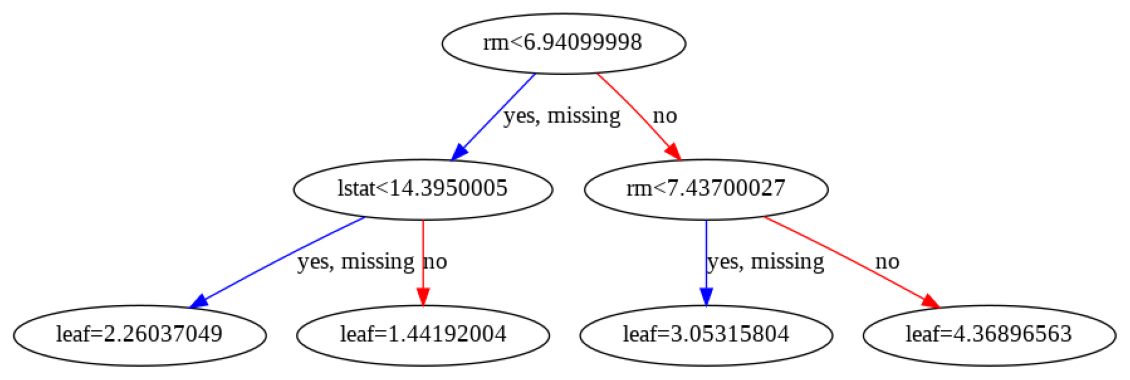

In [35]:
plt.rcParams['figure.figsize'] = 20,20
plot_tree(model)
plt.show()

- leaf 노드의 값 --> 로지스틱 함수에 넣으면 0~1 사이의 값으로 변환.

- 몇가지 옵션
    - num_trees = 0
    - rankdir='LR'

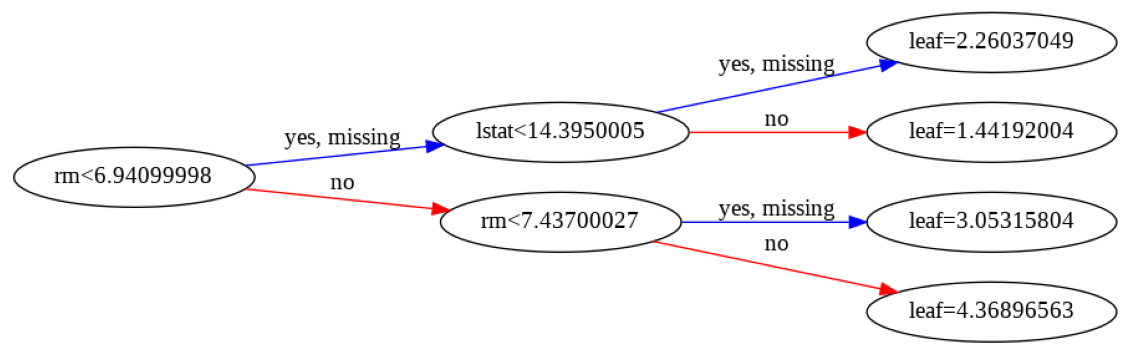

In [36]:
plot_tree(model, num_trees = 0, rankdir = 'LR')
plt.show()

- plot_importance
    - 변수중요도 기본값은 weight

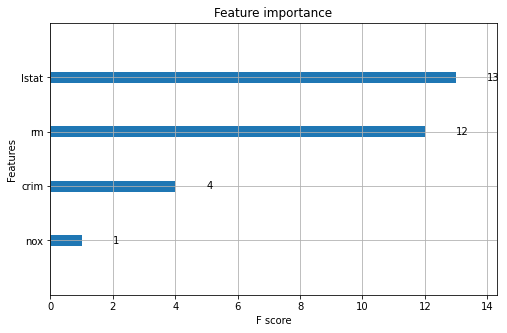

In [37]:
plt.rcParams['figure.figsize'] = 8, 5
plot_importance(model)
plt.show()

- model.feature_importances_ : 변수중요도 기본값은 gain

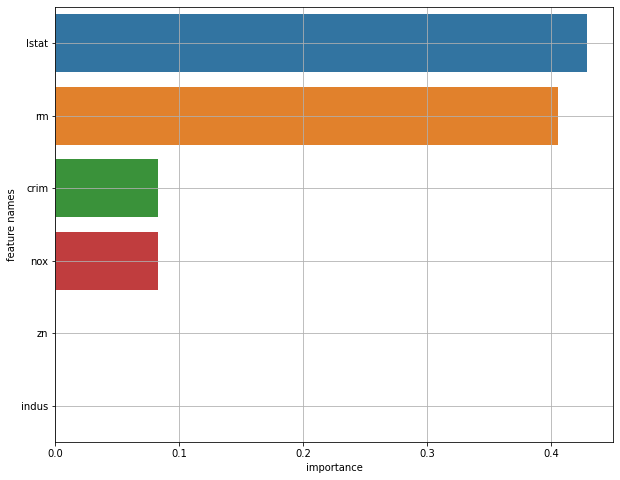

In [38]:
result = plot_feature_importance(model.feature_importances_, list(x),6)

- xgb의 변수 중요도
     - weight: 모델 전체에서 해당 feature가 split될 때 사용된 횟수의 합. (plot_tree에서의 기본값)
     - gain : feature별 평균 information gain.(model.feature_importances_의 기본값)
     - cover : feature가 split할때의 샘플 수의 평균.

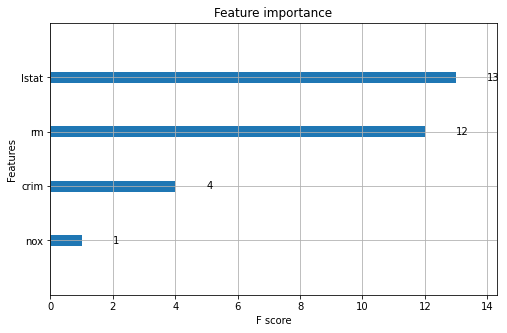

In [39]:
# importance_type='weight'
plot_importance(model)
plt.show()

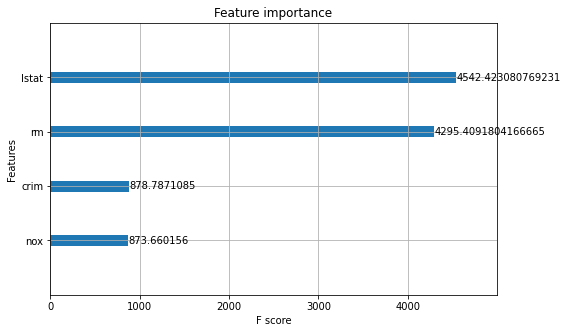

In [40]:
# importance_type='gain'
plot_importance(model, importance_type='gain')
plt.show()

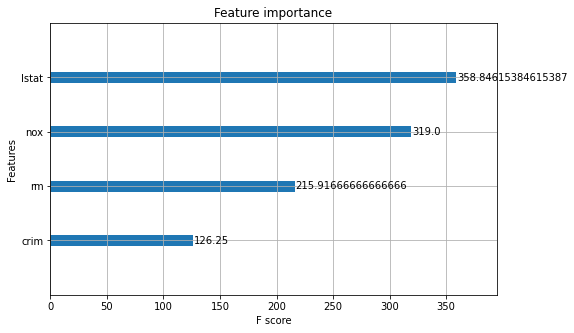

In [41]:
# importance_type='cover'
plot_importance(model, importance_type='cover')
plt.show()

### 4. 실습 : 직원 이직 예측모델 변수 중요도 비교

In [42]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head(10)

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1
5,0,44,Research & Development,2,1,Medical,Male,Manufacturing Director,3,Single,10209,5,2,16,2,2,2
6,0,41,Sales,10,2,Life Sciences,Male,Sales Executive,4,Single,6230,7,4,16,3,3,14
7,0,25,Sales,18,1,Life Sciences,Male,Sales Executive,3,Married,6232,2,2,6,3,2,3
8,0,50,Research & Development,2,3,Medical,Male,Research Director,3,Married,17639,5,4,30,3,3,4
9,0,47,Sales,4,2,Life Sciences,Female,Sales Executive,4,Single,4163,1,3,9,0,3,9


In [43]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [44]:
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

In [45]:
# 가변수화
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] 
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True) 

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# train, valid split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2022)

In [48]:
print(x_train.shape, x_val.shape)

(920, 38) (230, 38)


- class balance를 맞추기 위한 resampling

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

print(np.bincount(y_train))
print(np.bincount(y_train) / y_train.shape[0])

[833 833]
[0.5 0.5]


#### 4.2 모델링 with Resampling

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [59]:
# Decision Tree
params = {'max_depth':range(1, 10)}
dt = DecisionTreeRegressor()
model1 = GridSearchCV(dt, params, cv = 5)
model1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10)})

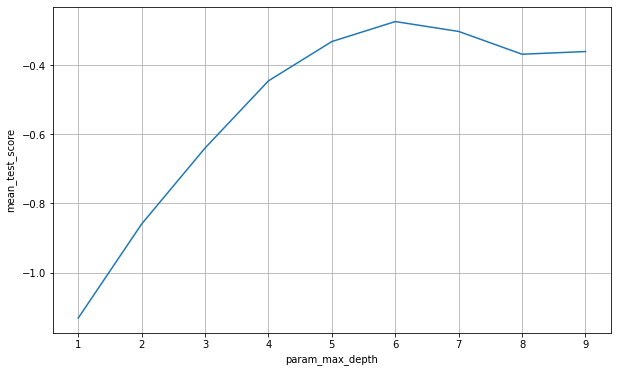

In [60]:
# 튜닝 과정 로그를 df로 저장
result = pd.DataFrame(model1.cv_results_)

plt.figure(figsize = (10,6))
sns.lineplot(x='param_max_depth', y='mean_test_score', data = result)
plt.grid()
plt.show()

In [61]:
best_model1 = model1.best_estimator_

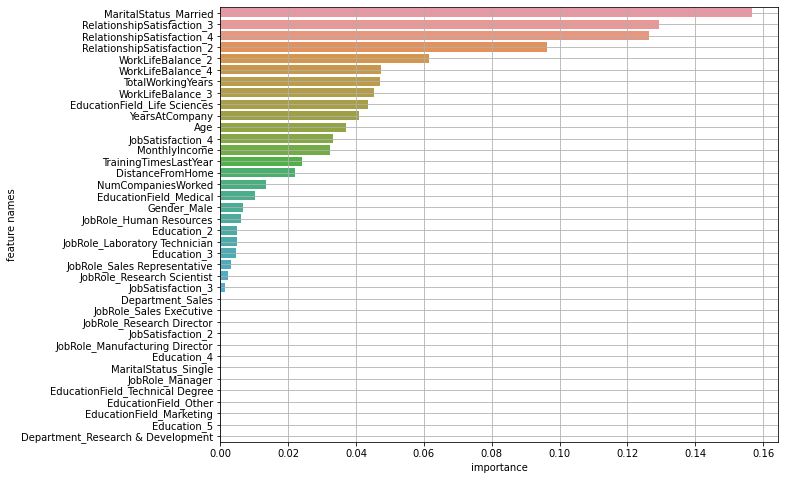

In [62]:
result1 = plot_feature_importance(model1.best_estimator_.feature_importances_, list(x))

In [64]:
pred1 = model1.predict(x_val)
print(mean_absolute_error(y_val, pred1))

0.2065842164136906


In [66]:
# Random Forest
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

RandomForestClassifier()

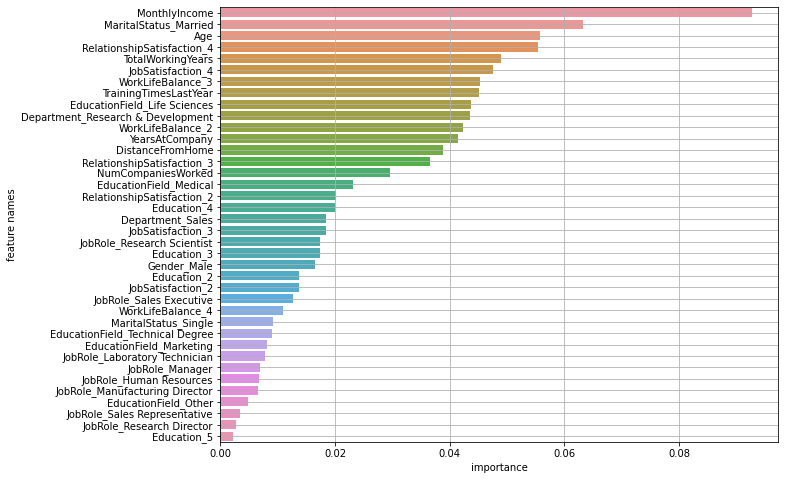

In [67]:
result2 = plot_feature_importance(model2.feature_importances_, list(x))

In [69]:
pred2 = model2.predict(x_val)
print(mean_absolute_error(y_val, pred2))

0.06521739130434782


In [68]:
# XGBoost
params = {
    'max_depth': range(1, 6),
    'learning_rate': np.linspace(0.01, 0.4, 100),
    'n_estimators': range(50, 150, 50)
}

xgb = XGBClassifier()
model3 = GridSearchCV(xgb, params, cv=5)
model3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': array([0.01      , 0.01393939, 0.01787879, 0.02181818, 0.02575758,
       0.02969697, 0.03363636, 0.03757576, 0.04151515, 0.04545455,
       0.04939394, 0.05333333, 0.05727273, 0.06121212, 0.06515152,
       0.06909091, 0.0730303 , 0.0769697 , 0.08090909, 0.08484848,
       0.08878788, 0.09272727, 0.09666667, 0.10060606, 0.10454545,
       0.10...
       0.28575758, 0.28969697, 0.29363636, 0.29757576, 0.30151515,
       0.30545455, 0.30939394, 0.31333333, 0.31727273, 0.32121212,
       0.32515152, 0.32909091, 0.3330303 , 0.3369697 , 0.34090909,
       0.34484848, 0.34878788, 0.35272727, 0.35666667, 0.36060606,
       0.36454545, 0.36848485, 0.37242424, 0.37636364, 0.38030303,
       0.38424242, 0.38818182, 0.39212121, 0.39606061, 0.4       ]),
                         'max_depth': range(1, 6),
                         'n_estimators': range(50, 150, 50)})

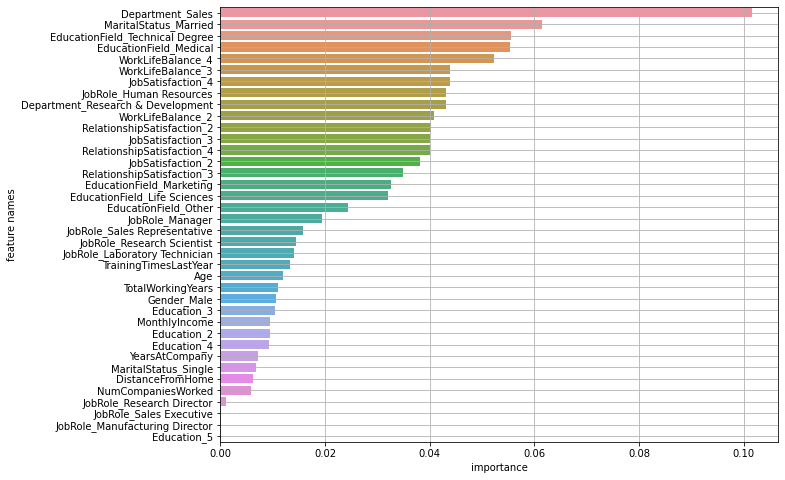

In [70]:
result3 = plot_feature_importance(model3.best_estimator_.feature_importances_, list(x))

In [71]:
pred3 = model3.predict(x_val)
print(mean_absolute_error(y_val, pred3))

0.06956521739130435
